In [576]:
!pip install pandas scikit-learn matplotlib plotly



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [577]:

import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import sklearn
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline
import plotly.express as px

In [578]:
# Asegúrate de que los paquetes necesarios estén instalados
!pip install pandas scikit-learn matplotlib plotly

# Llamar librerías

# 1. Manipulación de datos

# 1.1. División de datos
from sklearn.model_selection import train_test_split

# 2. Transformadores para predicciones

# 2.1. Clase para completar valores faltantes
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 2.2. Codificar datos categóricos con One-Hot -- Convertir a variables binarias
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder

# 2.3. Escalar valores numéricos
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

# 3. Transformador para el objetivo

# 3.1. Codificar la columna objetivo con etiquetas
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

# 4. Transformadores compuestos

# 4.1. Clase para aplicar múltiples transformadores de datos de manera paralela
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
from sklearn.compose import ColumnTransformer

# 4.2. Clase Pipeline: Clase para aplicar múltiples transformaciones de datos de manera secuencial.
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

# 5. Estimador

# 5.1. Estimador
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier

# Para trazar gráficos y diagramas de pipelines


from sklearn import set_config



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [579]:
#Mostrar las salidas de todos los comandos de una celda, no solo del último comando
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [580]:
#Importar modulo de warnings
#No importar warnings de tipo FutureWarning
import warnings
#No imprimir los warnings en pantalla
warnings.filterwarnings("ignore")

In [581]:
#lectura y procesado de los datos
base_dir = r"C:\Users\Usuario\Desktop\Ciber\nsl-kdd"
train_path = os.path.join(base_dir, "KDDTrain+.txt")
test_path = os.path.join(base_dir, "KDDTest+.txt")

#No hay columnas en la base da datos asique hay que crearlas para leer los datos
columnas = ["Duration", "ProtocolType", "Service", "Flag", "SrcBytes", "DstBytes", "Land", "WrongFragment", "Urgent", "Hot", "NumFailedLogins", "LoggedIn", "NumCompromised",
            "RootShell", "SuAttempted", "NumRoot", "NumFileCreations", "NumShells", "NumAccessFiles", "NumOutBoundcmds", "IsHostLogin", "IsGuestLogin", "Count", "SrvCount",
            "SerrorRate", "SrvsErrorRate", "RerrorRate", "SrvrErrorRate", "SameSrvRate", "DiffSrvRate", "SrvDiffHostRate", "DstHostCount", "DstHostSrvCount", "DstHostSameSrvRate",
            "DstHostDiffSrvRate", "DstHostSameSrcPortRate", "DstHostSrvDiffHostRate", "DstHostsErrorRate", "DstHostSrvsErrorRate", "DstHostrErrorRate",
            "DstHostSrvrError_rate", "Labels", "DifficultyLevel"]

train = pd.read_csv(train_path, header=None, names=columnas)
test = pd.read_csv(test_path, header=None, names=columnas)

train.shape
test.shape
train.columns=range(train.shape[1])
test.columns=range(test.shape[1])

data=pd.concat([train,test])
data.columns= columnas
data = data.drop('DifficultyLevel', axis = 1)
originalData = data.copy()


(125973, 43)

(22544, 43)

In [582]:
data.head()

,Duration,ProtocolType,Service,Flag,SrcBytes,DstBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostsErrorRate,DstHostSrvsErrorRate,DstHostrErrorRate,DstHostSrvrError_rate,Labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [583]:
data.tail()

,Duration,ProtocolType,Service,Flag,SrcBytes,DstBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostsErrorRate,DstHostSrvsErrorRate,DstHostrErrorRate,DstHostSrvrError_rate,Labels
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan


In [584]:
data.shape

(148517, 42)

In [585]:
data.dtypes

Duration                    int64
ProtocolType               object
Service                    object
Flag                       object
SrcBytes                    int64
DstBytes                    int64
Land                        int64
WrongFragment               int64
Urgent                      int64
Hot                         int64
NumFailedLogins             int64
LoggedIn                    int64
NumCompromised              int64
RootShell                   int64
SuAttempted                 int64
NumRoot                     int64
NumFileCreations            int64
NumShells                   int64
NumAccessFiles              int64
NumOutBoundcmds             int64
IsHostLogin                 int64
IsGuestLogin                int64
Count                       int64
SrvCount                    int64
SerrorRate                float64
SrvsErrorRate             float64
RerrorRate                float64
SrvrErrorRate             float64
SameSrvRate               float64
DiffSrvRate   

In [586]:
data['ProtocolType'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [587]:
data['Labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [588]:
#Elimino columnas innecesarias
data.drop(['Land','WrongFragment','Urgent','Hot','LoggedIn','NumCompromised','RootShell','IsGuestLogin','SrvCount','SerrorRate','SrvsErrorRate'],axis=1,inplace=True)


In [589]:
data.drop(['SameSrvRate','DiffSrvRate','SrvDiffHostRate','DstHostCount','DstHostSrvCount','DstHostSameSrvRate','DstHostDiffSrvRate','DstHostSameSrcPortRate','DstHostSrvDiffHostRate','DstHostsErrorRate','DstHostSrvsErrorRate','DstHostrErrorRate','DstHostSrvrError_rate'],axis=1,inplace=True)


Exploracion de los datos y visualización


In [590]:
labels = data.groupby("Labels")["Labels"].count().sort_values(ascending=False)
labels


Labels
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
sqlattack              2
udpstorm               2
worm              

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: xlabel='Labels'>

Text(0.5, 1.0, 'Número de ataques')

Text(0, 0.5, 'Cantidad')

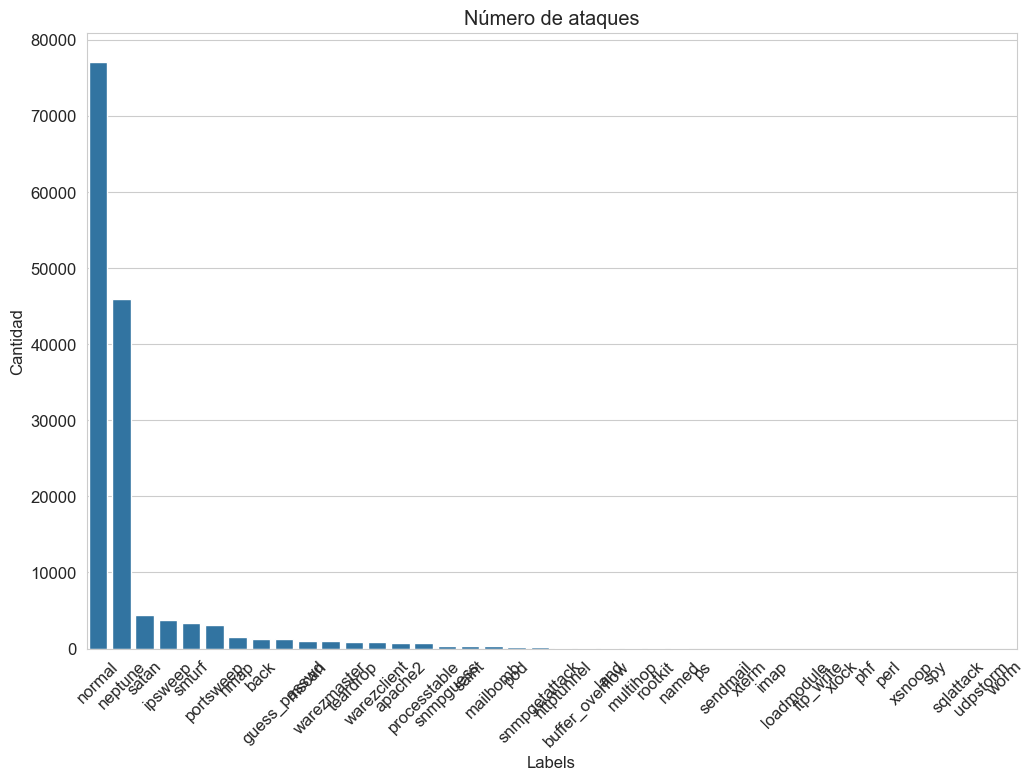

In [591]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,8)
font ={"size" :12}
plt.rc('font', **font)

plt.xticks(rotation=45)

sns.barplot(x=labels.index, y=labels.values)
plt.title("Número de ataques")
plt.ylabel("Cantidad")

In [592]:
protocols=data.groupby("ProtocolType")["ProtocolType"].count().sort_values(ascending=False)
protocols

ProtocolType
tcp     121569
udp      17614
icmp      9334
Name: ProtocolType, dtype: int64

<Axes: xlabel='ProtocolType'>

Text(0.5, 1.0, 'Tipo de Protocolo')

Text(0, 0.5, 'Cantidad')

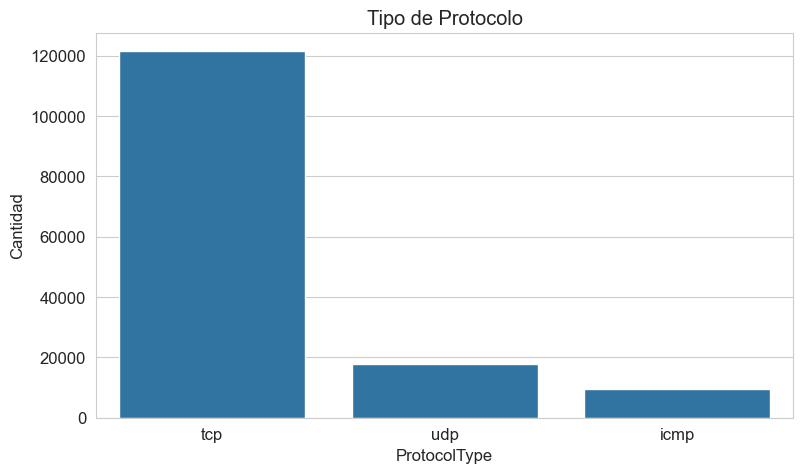

In [593]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (9,5)
font ={"size" :12}
plt.rc('font', **font)

sns.barplot(x=protocols.index, y=protocols.values)
plt.title("Tipo de Protocolo")
plt.ylabel("Cantidad")

In [594]:
len(data['Duration'].unique())

3424

In [595]:
len(data['SrcBytes'].unique())


3601

In [596]:
len(data['DstBytes'].unique())


10401

In [597]:
len(data['NumFailedLogins'].unique())


6

In [598]:
len(data['SuAttempted'].unique())


3

In [599]:
data['SuAttempted'].unique()


array([0, 1, 2], dtype=int64)

In [600]:
len(data['NumRoot'].unique())


91

In [601]:
len(data['NumFileCreations'].unique())


36

In [602]:
len(data['NumAccessFiles'].unique())


10

In [603]:
data['NumAccessFiles'].unique()



array([0, 1, 2, 3, 5, 4, 8, 6, 7, 9], dtype=int64)

In [604]:
len(data['NumOutBoundcmds'].unique())


1

In [605]:
len(data['IsHostLogin'].unique())


2

In [606]:
len(data['Count'].unique())


512

In [607]:
len(data['RerrorRate'].unique())


98

In [608]:
len(data['SrvrErrorRate'].unique())


95

In [609]:
len(data['Labels'].unique())


40

Creación de nuevas características(Inegeniería de características)

In [610]:
def removeDot(Label):
    "Elimina los puntos de las etiquetas"
    return Label.replace(".", "")


data["Labels"] = data["Labels"].apply(lambda Label: removeDot(Label))
print(pd.unique(data["Labels"]))

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


In [611]:
#mapeo de diferentes ataques por su tipo
tipoAtaques = {
    "back": "dos",
    "buffer_overflow": "u2r",
    "ftp_write": "r2l",
    "guess_passwd": "r2l",
    "imap": "r2l",
    "ipsweep": "probe",
    "land": "dos",
    "loadmodule": "u2r",
    "multihop": "r2l",
    "neptune": "dos",
    "nmap": "probe",
    "perl": "u2r",
    "phf": "r2l",
    "pod": "dos",
    "portsweep": "probe",
    "rootkit": "u2r",
    "satan": "probe",
    "smurf": "dos",
    "spy": "r2l",
    "teardrop": "dos",
    "warezclient": "r2l",
    "warezmaster": "r2l",
    "normal": "normal",
    "saint": "probe",
    "mscan": "probe",
    "apache2": "dos",
    "snmpgetattack": "r2l",
    "processtable": "dos",
    "httptunnel": "r2l",
    "ps": "u2r",
    "snmpguess": "r2l",
    "mailbomb": "dos",
    "named": "r2l",
    "sendmail": "r2l",
    "xterm": "u2r",
    "worm": "r2l",
    "xlock": "r2l",
    "xsnoop": "r2l",
    "sqlattack": "u2r",
    "udpstorm": "dos"
}

  

In [612]:
def mapAtaques(ataque):
    "Mapea el ataque a su tipo"
    return tipoAtaques[ataque]

originalLabels = data["Labels"].copy()
data["Labels"] = data["Labels"].apply(lambda ataque: mapAtaques(ataque))
#apply aplica la funcion a cada valor de la columna labels lo que sustituye la etiquetas de ataque por su tipo
print(pd.unique(data["Labels"]))

['normal' 'dos' 'r2l' 'probe' 'u2r']


Más visualizaciones de datos

<Axes: xlabel='Labels', ylabel='count'>

Text(0.5, 1.0, 'Tipos de ataques')

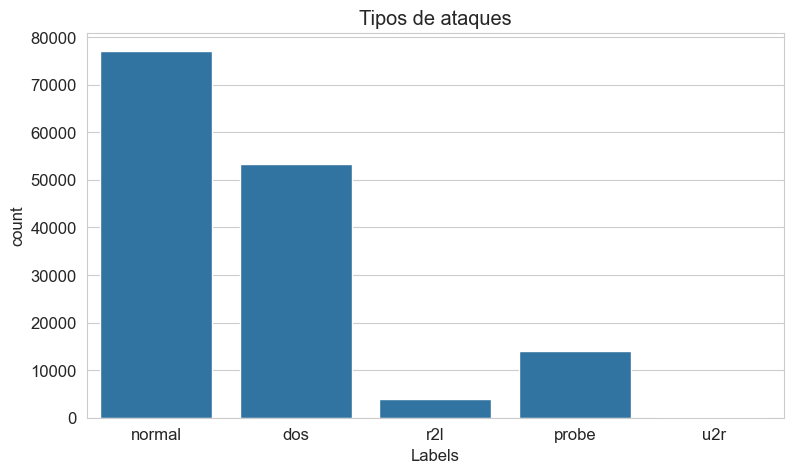

In [613]:

sns.countplot(x="Labels", data = data)
plt.title("Tipos de ataques")

Text(0.5, 1.0, 'Número de conexiones al mismo host')

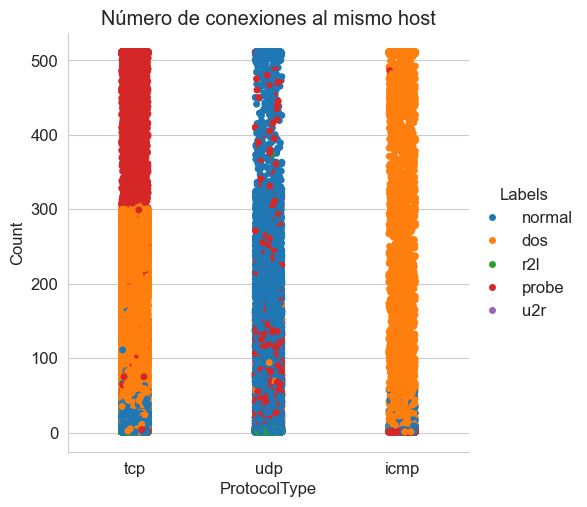

In [614]:
sns.catplot(x="ProtocolType", y="Count", hue="Labels", data=data)
plt.title("Número de conexiones al mismo host")

Text(0.5, 1.0, 'Archivos creados por conexión')

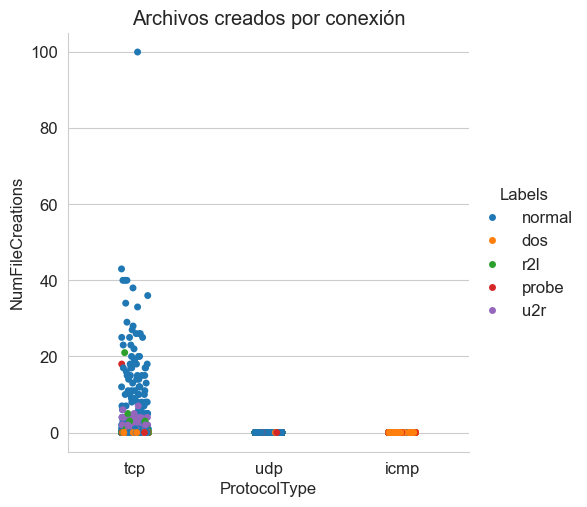

In [615]:
sns.catplot(x="ProtocolType", y="NumFileCreations", hue="Labels", data=data)
plt.title("Archivos creados por conexión")

Text(0.5, 1.0, 'Numero de shells creados por conexión')

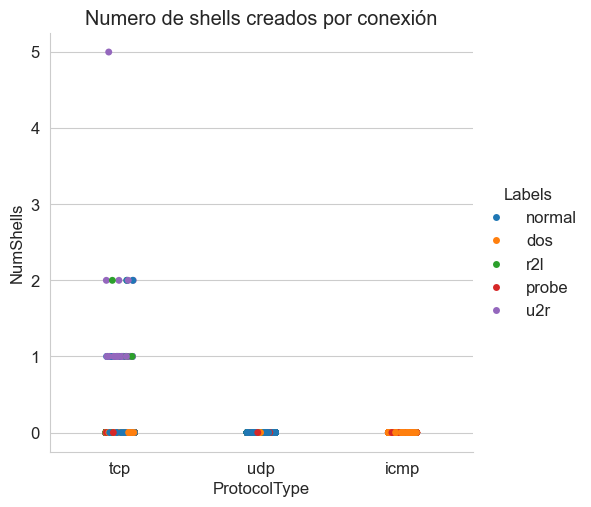

In [616]:
sns.catplot(x="ProtocolType", y="NumShells", hue="Labels", data=data)
plt.title("Numero de shells creados por conexión")

Text(0.5, 1.0, 'Numero de archivos accedidos por conexión')

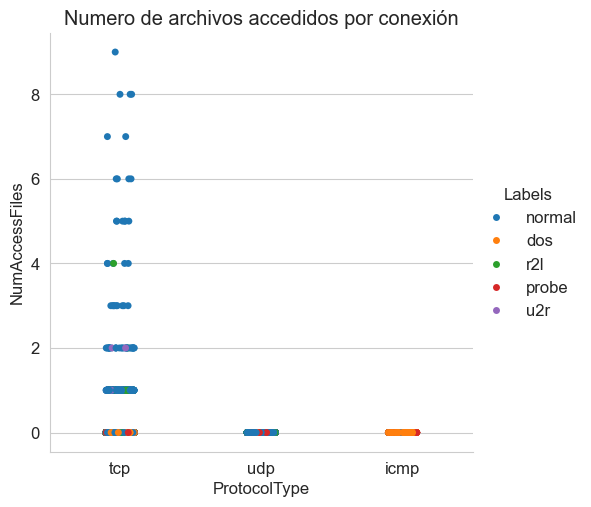

In [617]:
sns.catplot(x="ProtocolType", y="NumAccessFiles", hue="Labels", data=data)
plt.title("Numero de archivos accedidos por conexión")

Text(0.5, 1.0, 'Numero de accesos root por conexión')

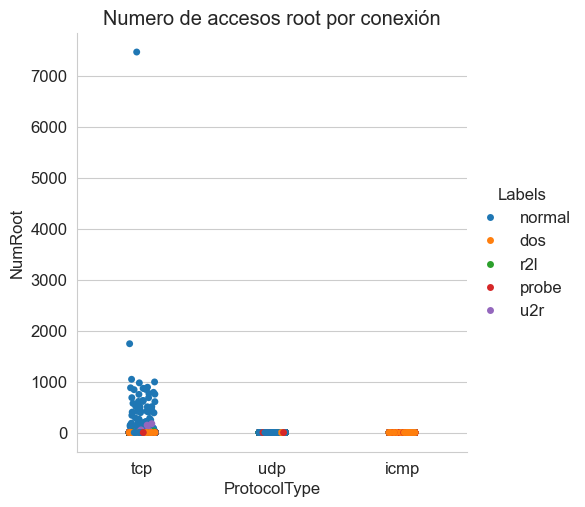

In [618]:
sns.catplot(x="ProtocolType", y="NumRoot", hue="Labels", data=data)
plt.title("Numero de accesos root por conexión")

Text(0.5, 1.0, 'Numero de intentos de root por conexión')

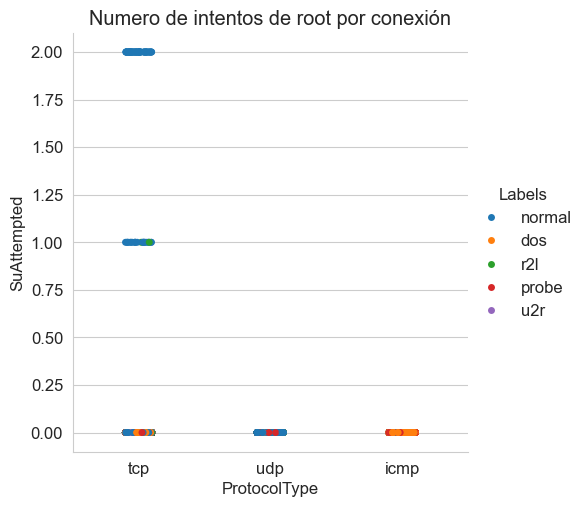

In [619]:
sns.catplot(x="ProtocolType", y="SuAttempted", hue="Labels", data=data)
plt.title("Numero de intentos de root por conexión")

Text(0.5, 1.0, 'Duración de las conexiones')

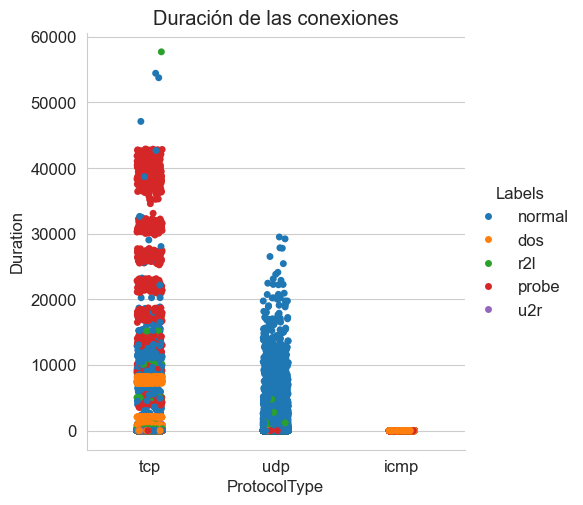

In [620]:
sns.catplot(x="ProtocolType", y="Duration", hue="Labels", data=data)
plt.title("Duración de las conexiones")

Text(0.5, 1.0, 'Bytes de datos enviados')

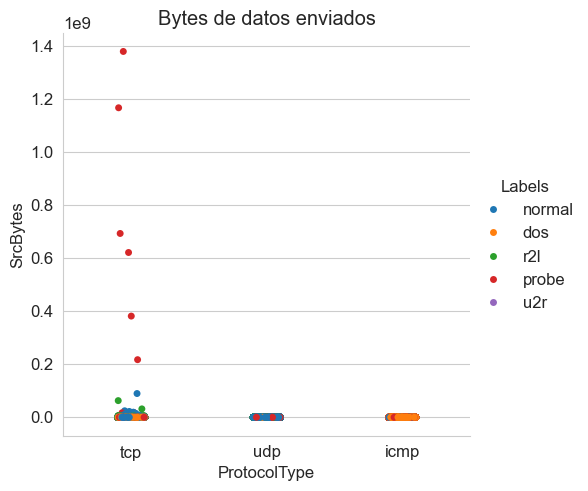

In [621]:
sns.catplot(x="ProtocolType", y="SrcBytes", hue="Labels", data=data)
plt.title("Bytes de datos enviados")

Text(0.5, 1.0, 'Bytes de datos recibidos')

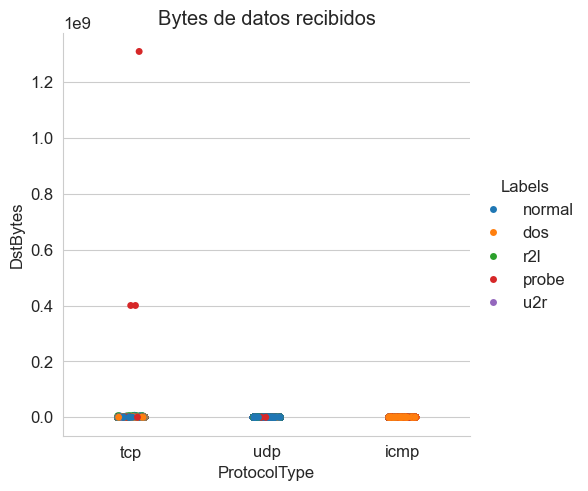

In [622]:
sns.catplot(x="ProtocolType", y="DstBytes", hue="Labels", data=data)
plt.title("Bytes de datos recibidos")

Text(0.5, 1.0, 'Mapa de calor de las correlaciones')

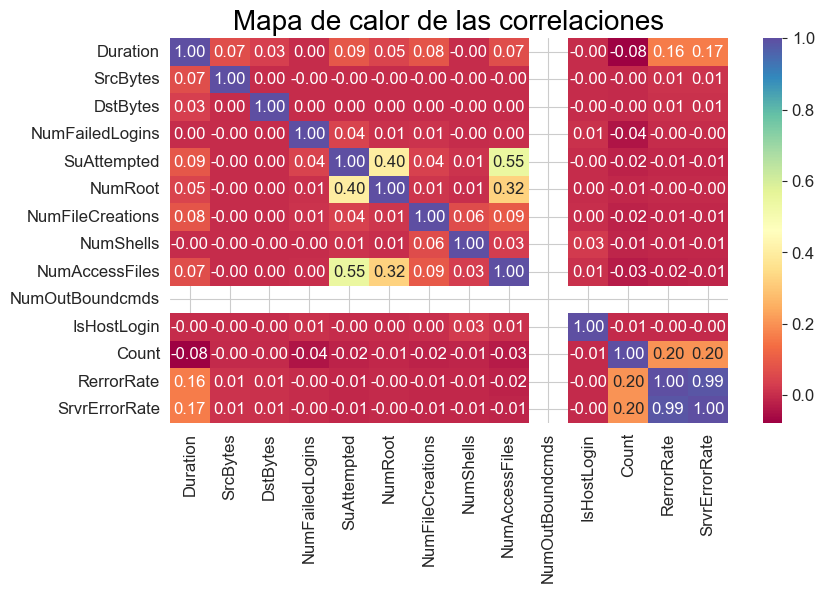

In [623]:
num_data = data.select_dtypes(include=[float, int]).copy()  # Selecciona solo columnas numéricas
num_data = num_data.dropna()  # Elimina filas con valores nulos
sns.heatmap(num_data.corr(), annot=True, fmt=".2f", cmap="Spectral", annot_kws={"size": 12}).set_title('Mapa de calor de las correlaciones', color='bLACK', fontsize=20)
plt.show()



Descubrir si los datos tienen alguna estructura

In [624]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148517 entries, 0 to 22543
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Duration          148517 non-null  int64  
 1   ProtocolType      148517 non-null  object 
 2   Service           148517 non-null  object 
 3   Flag              148517 non-null  object 
 4   SrcBytes          148517 non-null  int64  
 5   DstBytes          148517 non-null  int64  
 6   NumFailedLogins   148517 non-null  int64  
 7   SuAttempted       148517 non-null  int64  
 8   NumRoot           148517 non-null  int64  
 9   NumFileCreations  148517 non-null  int64  
 10  NumShells         148517 non-null  int64  
 11  NumAccessFiles    148517 non-null  int64  
 12  NumOutBoundcmds   148517 non-null  int64  
 13  IsHostLogin       148517 non-null  int64  
 14  Count             148517 non-null  int64  
 15  RerrorRate        148517 non-null  float64
 16  SrvrErrorRate     148517 n

In [625]:
data['Labels'].value_counts()

Labels
normal    77054
dos       53385
probe     14077
r2l        3882
u2r         119
Name: count, dtype: int64

In [626]:
data['ProtocolType'].value_counts()

ProtocolType
tcp     121569
udp      17614
icmp      9334
Name: count, dtype: int64

In [627]:
data.describe()

#count: El número de valores no nulos (la cantidad de entradas válidas en la columna).
#mean: El valor medio (promedio) de los datos numéricos.
#std: La desviación estándar, que mide la dispersión de los valores con respecto a la media.
#min: El valor mínimo en la columna.
#25%: El cuartil 25, es decir, el valor que marca el 25% inferior de los datos (el primer cuartil).
#50%: El cuartil 50, o la mediana, el valor que divide a la mitad los datos ordenados.
#75%: El cuartil 75, el valor que marca el 25% superior de los datos (el tercer cuartil).
#max: El valor máximo en la columna.


,Duration,SrcBytes,DstBytes,NumFailedLogins,SuAttempted,NumRoot,NumFileCreations,NumShells,NumAccessFiles,NumOutBoundcmds,IsHostLogin,Count,RerrorRate,SrvrErrorRate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.004323,0.000976,0.273726,0.012073,0.000525,0.004013,0.0,0.000081,83.336561,0.137947,0.138487
std,2460.683131,5.409612e+06,3.703525e+06,0.072248,0.042389,22.689023,0.517863,0.027701,0.095257,0.0,0.008988,116.760741,0.339387,0.341783
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,13.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,141.000000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,5.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,511.000000,1.000000,1.000000


In [628]:
num_data.head()
num_data.shape
num_data.columns


,Duration,SrcBytes,DstBytes,NumFailedLogins,SuAttempted,NumRoot,NumFileCreations,NumShells,NumAccessFiles,NumOutBoundcmds,IsHostLogin,Count,RerrorRate,SrvrErrorRate
0,0,491,0,0,0,0,0,0,0,0,0,2,0.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,13,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,123,0.0,0.0
3,0,232,8153,0,0,0,0,0,0,0,0,5,0.0,0.0
4,0,199,420,0,0,0,0,0,0,0,0,30,0.0,0.0


(148517, 14)

Index(['Duration', 'SrcBytes', 'DstBytes', 'NumFailedLogins', 'SuAttempted',
       'NumRoot', 'NumFileCreations', 'NumShells', 'NumAccessFiles',
       'NumOutBoundcmds', 'IsHostLogin', 'Count', 'RerrorRate',
       'SrvrErrorRate'],
      dtype='object')

In [629]:
col_data = data.select_dtypes(include = ['object']).copy()
col_data.head()
col_data.shape
col_data.columns

,ProtocolType,Service,Flag,Labels
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,dos
3,tcp,http,SF,normal
4,tcp,http,SF,normal


(148517, 4)

Index(['ProtocolType', 'Service', 'Flag', 'Labels'], dtype='object')

In [630]:
num_cols = ['Duration','SrcBytes','DstBytes','NumFailedLogins','SuAttempted',
            'NumRoot','NumFileCreations','NumShells','NumAccessFiles',
            'NumOutBoundcmds','IsHostLogin','Count','RerrorRate','SrvrErrorRate']
notnum_cols = ['ProtocolYype', 'Labels']

In [631]:
#Creo una instancia StandardScaler object
#StandardScaler es una herramienta de la librería scikit-learn
#que se usa para escalar o normalizar los datos de manera que tengan una media de 0 y una desviación estándar de 1.
ss= StandardScaler()

ndata = ss.fit_transform(num_data.loc[:,num_cols])
ndata.shape

(148517, 14)

In [632]:
ndata = pd.DataFrame(ndata, columns = num_cols)
#pd.DataFrame() para convertir el dataframe e uno de pandas
ndata.head(2)

,Duration,SrcBytes,DstBytes,NumFailedLogins,SuAttempted,NumRoot,NumFileCreations,NumShells,NumAccessFiles,NumOutBoundcmds,IsHostLogin,Count,RerrorRate,SrvrErrorRate
0,-0.112481,-0.007346,-0.004614,-0.059832,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,-0.008989,-0.696611,-0.40646,-0.405192
1,-0.112481,-0.007409,-0.004614,-0.059832,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,-0.008989,-0.602401,-0.40646,-0.405192


In [633]:
ndata = ndata.loc[:, ~ndata.columns.duplicated()] 
ndata.index = data.index  # Asegura que ambos DataFrames tengan el mismo índice

In [634]:
#Añado/Sobreescribo algunas columnas discretas que no deben escalarse
#Las columnas numéricas continuasse escalan para que el modelo no se vea influenciado por el rango o la magnitud de los valores.
#Las columnas discretas (como los intentos de acceso o comandos salientes, que son contadores) no requieren escalado porque su escala no afectará el análisis.
ndata['SuAttempted'] = data['SuAttempted']
ndata['NumAccessFiles'] = data['NumAccessFiles']
ndata['NumOutBoundcmds'] = data['NumOutBoundcmds']
ndata['IsHostLogin'] = data['IsHostLogin']


In [635]:
#creo un dataframe a partir de datos aleatorios para comparar y ver si siguen algun patron
rng = np.random.default_rng()
ndata_rand = pd.DataFrame(rng.normal(size = (5000,14)),
                       columns = num_cols
                       )
from random import choice
from random import randint

def randomNumber(*exclude):
  exclude = set(exclude)
  randInt = randint(0,8)
  return randomNumber(exclude) if randInt in exclude else randInt

ndata_rand['SuAttempted'] = np.random.randint(3,   size= (5000,))   # [0,1,2]
ndata_rand['IsHostLogin'] = np.random.randint(1, size= (5000,))   # [0.0]
ndata_rand['NumOutBoundcmds'] = np.random.randint(1,  size= (5000,))   # [0.0]
ndata_rand['NumAccessFiles'] = np.random.randint(randomNumber(5,7),   size= (5000,))   # [0,1,2,3,4,6,8]


ndata_rand.shape

(5000, 14)

In [636]:
#fig1 = plt.figure()
#pd.plotting.parallel_coordinates(ndata_rand,
 #                                'SuAttempted',    # class_column
  #                                colormap='winter'
        #                          )
#plt.xticks(rotation=85)
#plt.title("Gráfica paralela con datos aleatorios")

In [637]:
#Grafica paralela con los datos originales
#fig2 = plt.figure()
#pd.plotting.parallel_coordinates(ndata,
#                                 'SuAttempted',    # class_column
#                                  colormap='winter'
  #                                )
#plt.xticks(rotation=85)
#plt.title("Gráfica paralela con datos originales")

In [638]:
#fig3 = plt.figure()
#pd.plotting.andrews_curves(ndata_rand,
                    #       'SuAttempted',
                   #        colormap = 'winter')

#plt.title("Traza de Andrews con datos aleatorios")

In [639]:
#fig4 = plt.figure()
#pd.plotting.andrews_curves(ndata,
       #                    'SuAttempted',
         #                   colormap = plt.cm.winter
        #                   )
#plt.xticks(rotation=85)
#plt.title("Traza de Andrews con datos originales")

Codificación de datos categóricos

In [640]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = originalData.copy()
print(set(list(data['Labels'])))

data['Labels'] = le.fit_transform(data['Labels'])
data['ProtocolType'] = le.fit_transform(data['ProtocolType'])
data['Service'] = le.fit_transform(data['Service'])
data['Flag'] = le.fit_transform(data['Flag'])

print("min", data['Labels'].min())
print("max", data['Labels'].max())
print("mean", data['Labels'].mean())
print("mode", data['Labels'].mode())

  


{'xterm', 'teardrop', 'snmpgetattack', 'udpstorm', 'back', 'ipsweep', 'multihop', 'buffer_overflow', 'perl', 'sqlattack', 'ps', 'phf', 'land', 'snmpguess', 'neptune', 'imap', 'warezmaster', 'mscan', 'worm', 'ftp_write', 'xlock', 'sendmail', 'spy', 'nmap', 'loadmodule', 'xsnoop', 'apache2', 'processtable', 'satan', 'mailbomb', 'named', 'rootkit', 'warezclient', 'normal', 'httptunnel', 'pod', 'smurf', 'guess_passwd', 'saint', 'portsweep'}
min 0
max 39
mean 15.782233683686043
mode 0    16
Name: Labels, dtype: int32


In [641]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Se eliminan las características menos correlacionadas y con menor desviación estándar para eliminar la complejidad del modelo
corr_matrix = data.corr().abs().sort_values('Labels')
menosCorr = corr_matrix['Labels'].nsmallest(10)
menosCorr = list(menosCorr.index)
menosDes = data.std().to_frame().nsmallest(5, columns=0)
menosDes = list(menosDes.transpose().columns)
eliminacion = set(menosCorr + menosDes)
data_reduced = data.drop(eliminacion, axis=1)

# Definir características
data_x = data_reduced.drop('Labels', axis=1) #características independientes (todas menos Labels)
data_y = data_reduced['Labels'] #característica dependiente(Labels)


# Definir el número de componentes principales
n_components = 10

# Se instancia PCA
pca = PCA(n_components=n_components)

# Se ajusta y transforma data_x a PCA
x_pca = pca.fit_transform(data_x)

#Se divide el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_pca, data_y, test_size=0.5, random_state=42)

# Ahora X_train y X_test contienen las funciones transformadas después de PCA
# y_train e y_test contienen las etiquetas correspondientes

Entrenamos el clasificador Random Forest

RandomForestClassifier()

RandomForest en proceso...
RandomForest Evaluación: 0.924


<Figure size 900x500 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Tasa de Falsos Positivos')

Text(0, 0.5, 'Tasa de Verdaderos Positivos')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

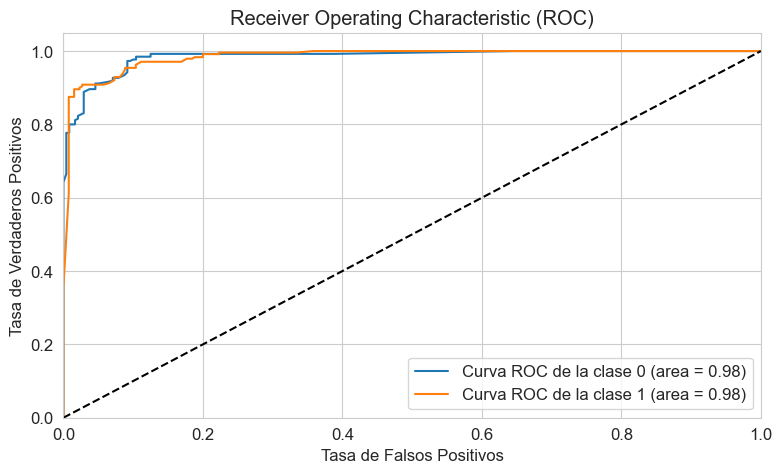

In [642]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generación de datos de ejemplo
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10, n_informative=2, n_clusters_per_class=1, random_state=42)
#x= características de las muestras (1000 muestras con 10 características)
#y= etiquetas de las clases correspondientes 0 o 1

# división de datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

#Creación de RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', bootstrap=True)

# Entrenamiento del calsificador
RF.fit(x_train, y_train)
#Aquí, el modelo aprende las relaciones entre las características de entrada (x_train) y las etiquetas (y_train) para luego poder hacer predicciones.

#EValuación del RandomForestClassifier
rf_score = RF.score(x_test, y_test)
print('RandomForest en proceso...')
print('RandomForest Evaluación:', rf_score)

#Hacer prediccion con el test
y_pred = RF.predict_proba(x_test)
#predict_proba devuelve la probabilidad de pertenecer a cada clase. Esto es útil para la curva ROC y otras evaluaciones.

# Calculo de la curva ROC y área ROC para cada clase
fp = dict() #tasa de falso positivo
tp = dict() #tasa de verdadero positivo
roc_area = dict()
n_clases = y_pred.shape[1]  # Numero de clases basado en y_pred
for i in range(n_clases):
    fp[i], tp[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    roc_area[i] = auc(fp[i], tp[i])


plt.figure()
for i in range(n_clases):
    plt.plot(fp[i], tp[i], label='Curva ROC de la clase {0} (area = {1:0.2f})'.format(i, roc_area[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Búsqueda de hiperparámetros

In [643]:
from sklearn.model_selection import GridSearchCV #Busqueda de combinación de hiperparámetros en cuadrícula
param_grid ={
    'n_estimators' : [10,50,100],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

busqueda = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5) #Encargado de probar todas las combinaciones
busqueda.fit(x_train, y_train)
print("Mejores hiperparámetros:", busqueda.best_params_)
mejorModelo = busqueda.best_estimator_
precision = mejorModelo.score(x_test, y_test)
print("Precision:", precision)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Precision: 0.928


In [644]:
x_testDF = pd.DataFrame(x_test, columns=[f"Feature{i}" for i in range(x_test.shape[1])]) #convertimos x_test en un dataframe de pandas
print(x_testDF)

     Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0    2.218210 -0.709021 -1.793892 -1.153332 -0.391227  1.637681  0.918234   
1    0.841023 -1.089633 -0.847634  1.809306 -0.886888  1.245940  0.347222   
2    0.719914 -1.244486  1.010840 -0.633273  0.980464 -0.405691  0.299393   
3    0.549020  0.686568  1.366389  0.589639  1.453814 -0.906938  0.229204   
4   -0.419654  1.221295  1.548639 -1.336569  2.273292 -2.171021 -0.170971   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.561003  0.520689 -0.237807  0.473145  3.113533 -3.554387 -0.642638   
496  1.574242  0.610216 -0.962733 -0.342549 -0.714525  1.531963  0.651116   
497  1.410559 -1.615887  0.204759 -0.022300 -0.499035  1.253184  0.583592   
498  0.156409  0.551964  0.822350 -0.206985  1.225221 -0.944746  0.066310   
499 -0.246759 -0.900448 -0.822166 -0.451303  2.199165 -2.006449 -0.099455   

     Feature7  Feature8  Feature9  
0   -1.687344  1.953259 -1.355448  
1  

In [645]:
print(data[['Labels']].drop_duplicates())



       Labels
0          16
2          14
13         34
17          7
33         20
46         32
56         15
62         25
138        27
211        19
366         1
689         4
2294        3
3005       12
3173       23
5579        2
6086        6
7040       35
10738      18
16015       8
19448       9
21445      30
66007      17
3          24
4          11
30          0
57         28
58         21
93          5
106        22
119        29
153        10
738        13
904        26
2421       39
3111       36
4028       37
5282       38
5478       31
8700       33


In [646]:
predicciones = RF.predict(X_test)

for predicciones in predicciones:
    if predicciones == 0:
        print("Normal")
    else:
        print("Attack")

Attack
Attack
Attack
Attack
Normal
Normal
Attack
Attack
Normal
Normal
Attack
Normal
Attack
Normal
Attack
Attack
Attack
Normal
Attack
Normal
Attack
Attack
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Normal
Normal
Attack
Attack
Attack
Attack
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Attack
Normal
Attack
Normal
Attack
Normal
Attack
Normal
Normal
Attack
Attack
Normal
Attack
Attack
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Normal
Attack
Attack
Normal
Attack
Normal
Attack
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Attack
Normal
Normal
Attack
Normal
Normal
Attack
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Attack
Attack
Attack
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Attack
Normal
Normal
Normal
Normal
Normal
Attack
Normal
Attack
Normal
Normal
Normal
Normal
Attack
Normal
Attack
Normal
Attack
Normal
Normal

In [647]:
import gradio as gr
import numpy as np

def predicciones(caracteristicas):
    try:
        #dividir la entrada en una lista de características
        listaCaracteristicas = caracteristicas.split()
        # Convertir las características a un array numpy
        
        arrayCaracteristicas = np.array(listaCaracteristicas, dtype=float)
        # Transformar la matriz en un array 2D con una sola fila
        arrayCaracteristicas = arrayCaracteristicas.reshape(1, -1)
        #se hacen predicciones usando el RF
        prediccion = RF.predict(arrayCaracteristicas)[0]
        
        if prediccion == 0:
            return "Normal"
        else:
            return "Ataque"
    except:
        return "Entrada no válida. Introduzca características numéricas separadas con espacios."

textbox = gr.Textbox(placeholder="Introduzca características separadas con espacios", label="Características:")

iface= gr.Interface(predicciones, textbox, "label", title="Predicción de ataques", description="Introduzca las características separadas por espacios. Recibiras una predicción 'Normal' o 'Ataque'", theme="monochrome")

iface.launch()
                    

* Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
